In [41]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

import bs4
import requests
import json
import subprocess
import os

%matplotlib inline

from datetime import datetime

![CRISP_DM](CRISP_DM.png)

## Data Preparation

### John Hopkins GITHUB csv data

In [42]:
data_path="../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data=pd.read_csv(data_path)

In [43]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


#### Each column has different type of information eg. Country, State, Dates etc.
#### To plot the data we will need to extract the information we actually need from the raw data
#### Hence, we will extract dates, countries and make a new data frame for each information 

In [44]:
time_idx=raw_data.columns[4:]

In [45]:
df_plot=pd.DataFrame({'date':time_idx})
df_plot

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
5,1/27/20
6,1/28/20
7,1/29/20
8,1/30/20
9,1/31/20


In [46]:
raw_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [47]:
len(raw_data['Country/Region'].unique())

188

#### Now we will check how the data looks for a single country eg. United Kingdom which has data from different states too

In [48]:
raw_data[raw_data['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
246,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
247,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,168,168,168,168,168,169,169,172,172,172
248,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,21,26,26,26,35,35,47,47,47,47
249,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,205,205,205,205,205,205,205,205,205,205
250,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,616,620,623,623,625,625,625,625,630,631
251,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,248,256,270,272,274,275,285,288,290,295
253,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336
254,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
255,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,383,383,464,482,490,490,505,508,538,538


#### For data visualization 'Lat' and 'Long' column won't be of any importance. Also to have a comparable plot of all countries, having a sum of all cases from each State/Provience is more convenient
#### Hence we will extract the important data (No.of COVID-19 cases for each date) and pass it to seperate data frame

In [49]:
raw_data[raw_data['Country/Region']=='United Kingdom'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         2
2/1/20          2
2/2/20          2
2/3/20          8
2/4/20          8
2/5/20          9
2/6/20          9
2/7/20          9
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        15
2/12/20        16
2/13/20        17
2/14/20        18
2/15/20        18
2/16/20        18
2/17/20        19
2/18/20        19
2/19/20        20
2/20/20        22
2/21/20        23
2/22/20        23
2/23/20        28
2/24/20        30
2/25/20        34
2/26/20        37
2/27/20        44
2/28/20        56
2/29/20        61
3/1/20         94
3/2/20        134
3/3/20        189
3/4/20        246
3/5/20        295
3/6/20        374
3/7/20        429
3/8/20        483
3/9/20        630
3/10/20       889
3/11/20      1301
3/12/20      1790
3/13/20      2270
3/14/20      2634
3/15/20      3077
3/16/20      3692
3/17/20   

#### Similarly this can be done for all countries. 

In [50]:
con_list=['Germany','Korea, South','China','France','India']

In [51]:
for each in con_list:
    df_plot[each]=np.array(raw_data[raw_data['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [52]:
df_plot

,date,Germany,"Korea, South",China,France,India
0,1/22/20,0,1,548,0,0
1,1/23/20,0,1,643,0,0
2,1/24/20,0,2,920,2,0
3,1/25/20,0,2,1406,3,0
4,1/26/20,0,3,2075,3,0
5,1/27/20,1,4,2877,3,0
6,1/28/20,4,4,5509,4,0
7,1/29/20,4,4,6087,5,0
8,1/30/20,4,4,8141,5,1
9,1/31/20,5,11,9802,5,1


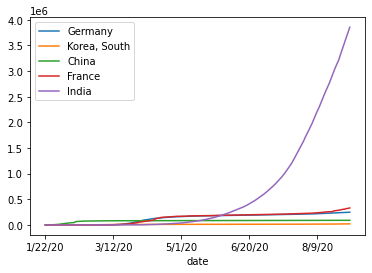

In [53]:
#### we can now plot this data by setting date as index
%matplotlib inline
df_plot.set_index('date').plot()

### Data Type Date

In [54]:
## here the data type of date is of type string. This can be converted to date object using datetime library
type(df_plot.date[0])

str

In [55]:
time_idx=[datetime.strptime(each,"%m/%d/%y")for each in df_plot.date]


In [56]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]
#convert to ISO format so it is readable in other type of documents

In [57]:
#we will now pass this date objecct to our data frame
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
df_plot.head()

,date,Germany,"Korea, South",China,France,India
0,2020-01-22,0,1,548,0,0
1,2020-01-23,0,1,643,0,0
2,2020-01-24,0,2,920,2,0
3,2020-01-25,0,2,1406,3,0
4,2020-01-26,0,3,2075,3,0


In [59]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model- defining a primary key

In [60]:
data_path="../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data=pd.read_csv(data_path)

In [61]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [62]:
pd_data_base=raw_data.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [63]:
# we drop the 'Lat' and 'Long' column as the data is static and of no use in this data visualisation
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,no,Albania,0,0,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,no,Algeria,0,0,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,no,Andorra,0,0,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,no,Angola,0,0,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [64]:
# setting the country and state as indexpd_data_base.set_index(['state','country'])
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [65]:
test_pd.columns

MultiIndex([(                          'no',         'Afghanistan'),
            (                          'no',             'Albania'),
            (                          'no',             'Algeria'),
            (                          'no',             'Andorra'),
            (                          'no',              'Angola'),
            (                          'no', 'Antigua and Barbuda'),
            (                          'no',           'Argentina'),
            (                          'no',             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                          'no',      'United Kingdom'),
            (                          'no',             'Uruguay'),
            (                          'no',          'Uzbekistan'),
            (                          'no',           'Venezuela'),
            (     

In [66]:
# stacking the multi column to row base
pd_relational_model=test_pd.stack(level=[0,1]).reset_index()

In [67]:
pd_relational_model=pd_relational_model.rename(columns={'level_0':'date',0:'confirmed'})

In [68]:
#checking the data type of each object
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [69]:
#converting the date object to date 
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [70]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [71]:
print(pd_relational_model[pd_relational_model['country']=='China'].tail())

            date     state country  confirmed
59656 2020-09-02   Tianjin   China      229.0
59657 2020-09-02     Tibet   China        1.0
59661 2020-09-02  Xinjiang   China      902.0
59663 2020-09-02    Yunnan   China      199.0
59664 2020-09-02  Zhejiang   China     1278.0


## For US Data

In [72]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
raw_data_US=pd.read_csv(data_path)
raw_data_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,633,628,616,614,620,624,628,628,629,617
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,510,511,513,515,517,523,533,535,538,541
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,946,967,968,979,983,1004,1025,1034,1045,1036


In [73]:
# dropping the irrelevant data and reanaming necessary data for ease
raw_data_US=raw_data_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=raw_data_US.rename(columns={'Province_State':'state'}).copy()
pd_data_base_US.head()

,state,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345
1,Alabama,0,0,0,0,0,0,0,0,0,...,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458
2,Alabama,0,0,0,0,0,0,0,0,0,...,633,628,616,614,620,624,628,628,629,617
3,Alabama,0,0,0,0,0,0,0,0,0,...,510,511,513,515,517,523,533,535,538,541
4,Alabama,0,0,0,0,0,0,0,0,0,...,946,967,968,979,983,1004,1025,1034,1045,1036


In [74]:
pd_data_base_US["state"].unique

<bound method Series.unique of 0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3335    Wyoming
3336    Wyoming
3337    Wyoming
3338    Wyoming
3339    Wyoming
Name: state, Length: 3340, dtype: object>

In [75]:
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] 
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [76]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [77]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [78]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
59625  2020-01-22  Alabama      US        0.0
59626  2020-01-22  Alabama      US        0.0
59627  2020-01-22  Alabama      US        0.0
59628  2020-01-22  Alabama      US        0.0
59629  2020-01-22  Alabama      US        0.0
...           ...      ...     ...        ...
811120 2020-09-02  Wyoming      US      433.0
811121 2020-09-02  Wyoming      US      303.0
811122 2020-09-02  Wyoming      US        0.0
811123 2020-09-02  Wyoming      US      109.0
811124 2020-09-02  Wyoming      US       19.0

[751500 rows x 4 columns]


### Crosschecking sum of US data

In [79]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [80]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1.0
2020-01-23,US,1.0
2020-01-24,US,2.0
2020-01-25,US,2.0
2020-01-26,US,5.0
2020-01-27,US,5.0
2020-01-28,US,5.0
2020-01-29,US,5.0
2020-01-30,US,5.0
